# Задача регрессии

## Датасет

Этот набор данных предназначен для прогнозирования сроков доставки продуктов на основе различных влияющих факторов, таких как расстояние, погода, дорожные условия и время суток. 

Актуальность задачи: сейчас очень сильно развиваются сети доставки. Пользователю важно понимать, когда будет доставлен его заказ. Проведя данное исследование, мы можем правильно оценивать время доставки и давать пользователю примерное время.

* Order_ID: Уникальный идентификатор для каждого заказа.

* Distance_km: Расстояние доставки в километрах.

* Weather: Погодные условия во время доставки, включая ясную погоду, дождь, снег, туман и ветер.

* Traffic_Level: Дорожные условия, классифицируемые как низкие, средние или высокие.

* Time_of_Day: Время, когда была осуществлена доставка, может быть указано утром, днем, вечером или ночью.

* Vehicle_Type: Тип транспортного средства, используемого для доставки, включая велосипед, скутер и автомобиль.

* Preparation_Time_min: Время, необходимое для подготовки заказа, измеряется в минутах.

* Courier_Experience_yrs: Опыт работы курьера в годах.

* Delivery_Time_min: Общее время доставки в минутах (целевая переменная).

### Метрики

Для оценки моделей я решил взять метрики MSE и R²

**MSE (Mean Squared Error)**
MSE измеряет среднее значение квадратов разностей между предсказанными и фактическими значениями.

Преимущества для анализа:
* Чувствительность к большим ошибкам: Поскольку ошибки возводятся в квадрат, MSE более строго наказывает крупные отклонения, что важно для задачи прогнозирования времени доставки. Например, большая ошибка в прогнозе (скажем, 100 минут вместо 50) может привести к серьёзным последствиям в логистике.
* Отражение общей точности: MSE показывает, насколько в среднем модель ошибается, что даёт понятное представление о качестве прогнозов.
Метрика оптимизации: MSE часто используется в качестве функции потерь для обучения моделей, так как она дифференцируема и хорошо подходит для градиентных методов.

**R² (Коэффициент детерминации)**
R² измеряет долю дисперсии целевой переменной (времени доставки), объясняемую моделью.

Преимущества для анализа:
* Интуитивно понятная интерпретация: Значения R² варьируются от 0 до 1 (или даже ниже 0 при плохой модели), где 1 указывает на то, что модель идеально объясняет целевую переменную. Например, если R² = 0.85, это значит, что 85% вариации времени доставки объясняются выбранными факторами.
* Независимость от масштаба: В отличие от MSE, R² не зависит от масштаба целевой переменной, что упрощает интерпретацию и сравнение моделей.
* Объясняет важность факторов: Высокое значение R² демонстрирует, что выбранные факторы (расстояние, погода и т. д.) действительно объясняют значительную часть вариации в данных.

**Почему использование обоих метрик оправдано?**
* MSE предоставляет информацию о величине ошибки в абсолютных единицах (минуты), а R² показывает, насколько хорошо модель объясняет данные в целом.
* MSE помогает фокусироваться на минимизации ошибок, а R² позволяет оценить качество выбранных факторов и их влияние на целевую переменную.
* В случае высоких ошибок (по MSE) с низким R² можно заподозрить, что модель не учла некоторые ключевые факторы.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('./Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

### Создание бейзлайна

In [ ]:
df.drop(columns=['Order_ID'], inplace=True)

label_encoders = {}
categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 115.02734463276839
R^2 Score: 0.7185669929559194


### Улучшение бейзлайна

Исследуем наш датасет. Попробуем увидеть закономерности: выведем графики и гистограмы.

In [8]:
df = pd.read_csv('./Food_Delivery_Times.csv')
df.dropna(inplace=True)
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [9]:
df.drop(columns=['Order_ID'], inplace=True)

categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

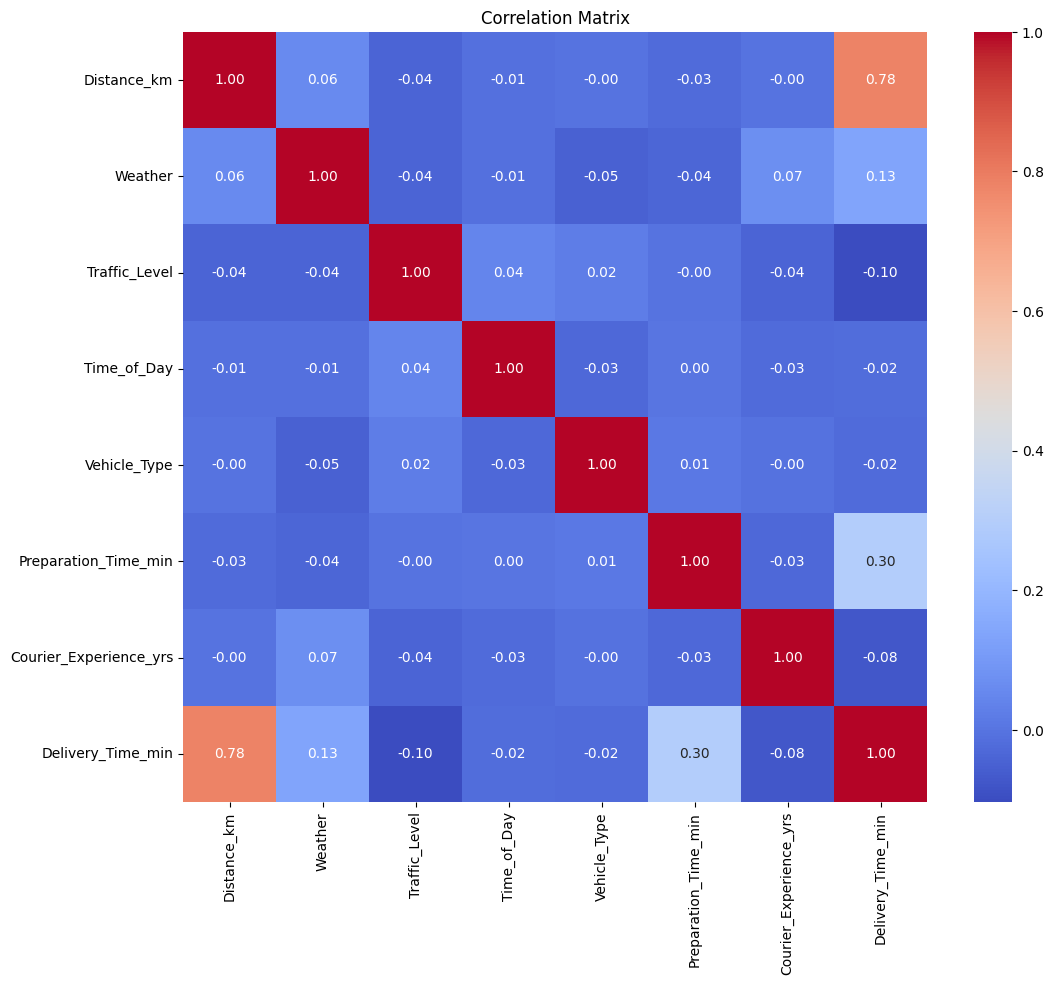

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

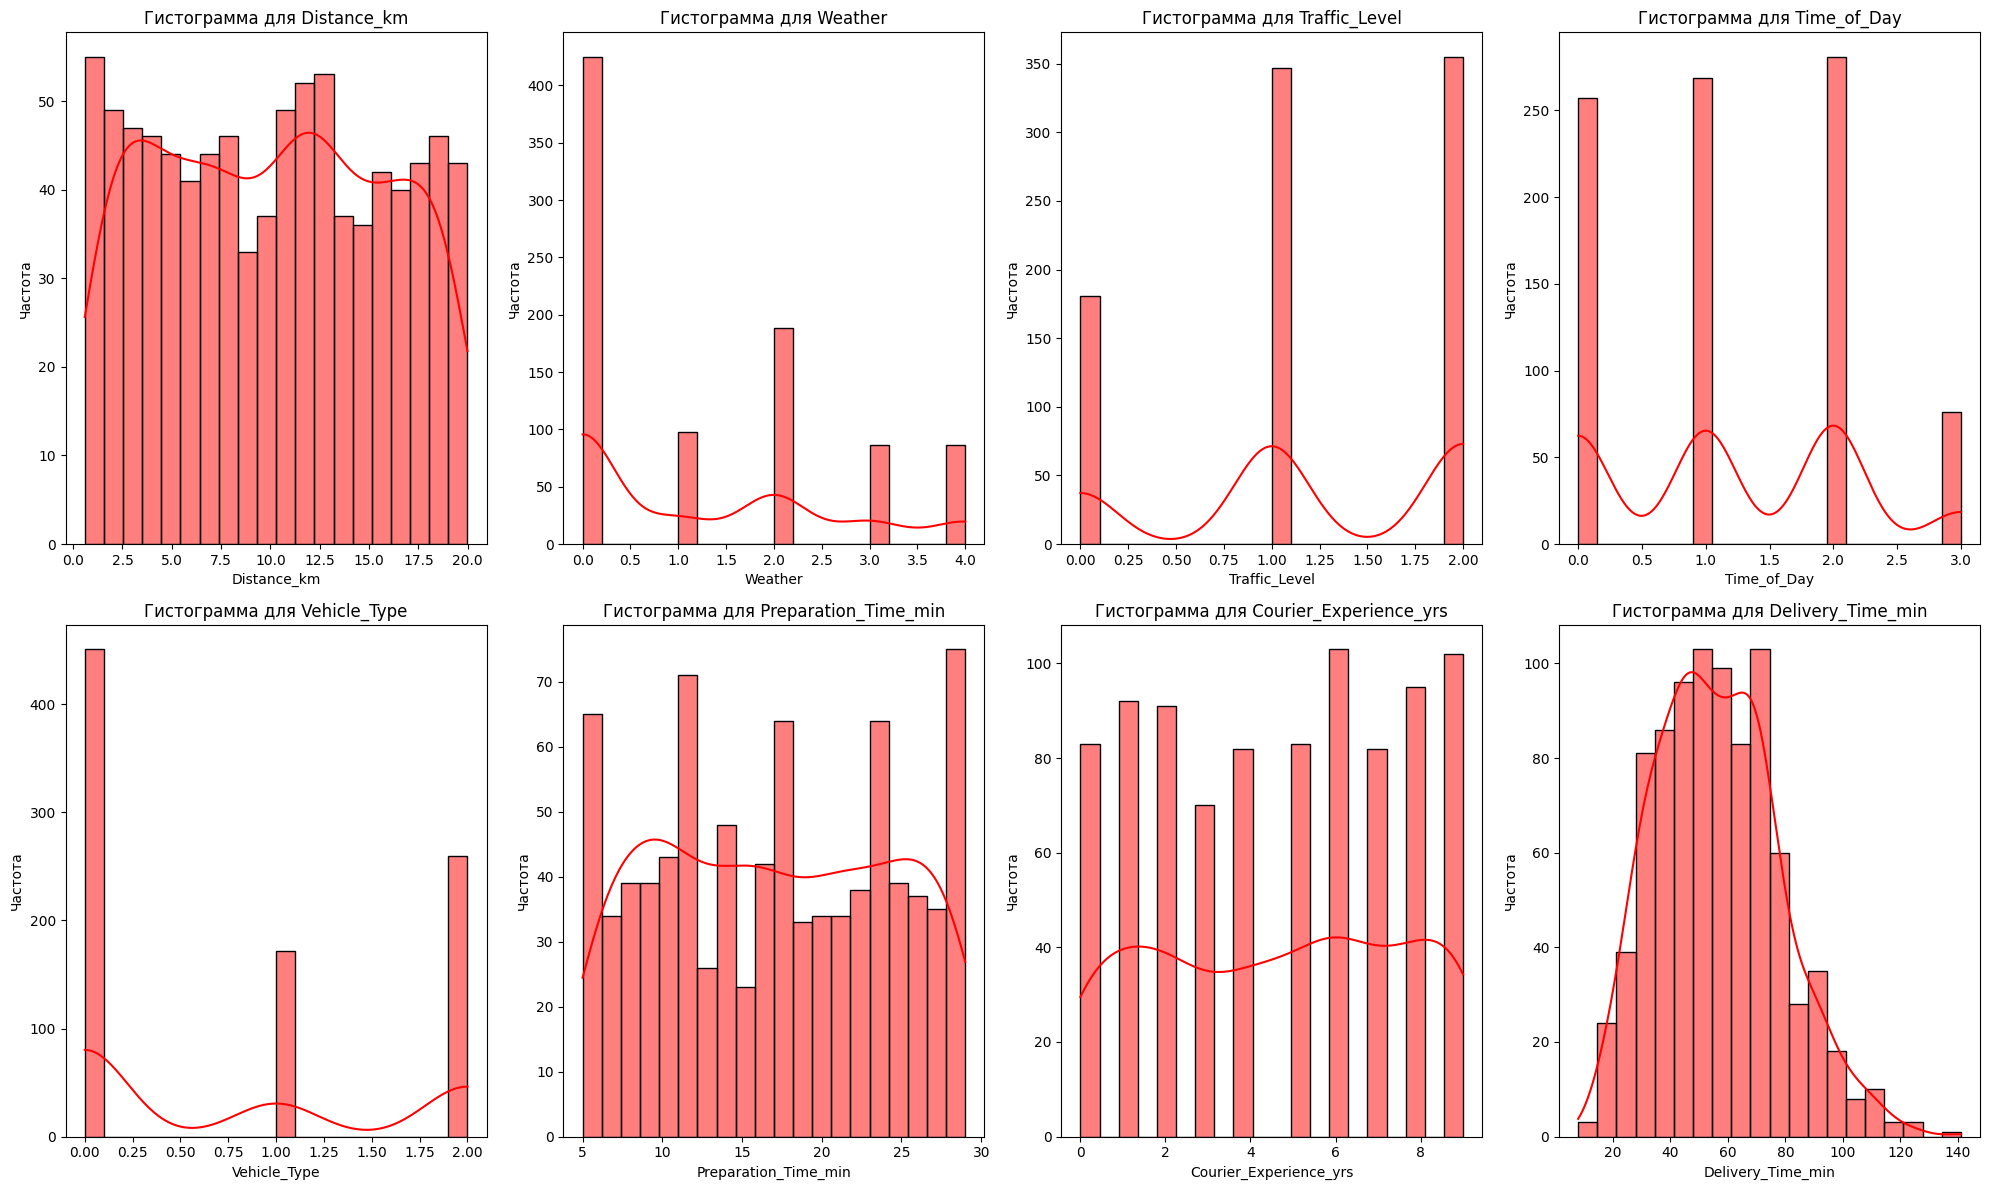

In [11]:
numerical_columns = df.select_dtypes(include=["number"]).columns
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()
for idx, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[idx], color='red', bins=20)
    axes[idx].set_title(f'Гистограмма для {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

Попробуем улучшить бейзлайн с помощью подбора гиперпараметров и применения OneHotEncoder к категориальным признакам

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

param_grid = {
    'regressor__n_neighbors': range(1, 30),
    'regressor__weights': ['uniform', 'distance'],
    'regressor__metric': ['euclidean', 'manhattan', 'minkowski']
}

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']),
        ('cat', OneHotEncoder(), ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'])
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Лучшие параметры:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
print("MSE Score:", mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Лучшие параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 29, 'regressor__weights': 'distance'}
MSE Score: 104.24395683053761
R^2 Score: 0.7449502956827019


### Выводы
Немного улучшили метрики

### Имплементация алгоритма машинного обучения

In [ ]:
from collections import Counter

class KNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = [self._euclidean_distance(x, x_train_dist) for x_train_dist in self.X_train]
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_values = [self.y_train[i] for i in k_indices]
            predictions.append(np.mean(k_nearest_values))
            
        return predictions

In [14]:

knn_class = KNN(2)
knn_class.fit(X_train, y_train)
print("KNN Results:")
print(f"MSE: {mean_squared_error(y_test, knn_class.predict(X_test))}")
print(f"R2: {r2_score(y_test, knn_class.predict(X_test))}")

KNN Results:
MSE: 162.92655367231637
R2: 0.6013738292080295


### Выводы
Наша иплементация оказалось хуже, чем библиотечная.

## Логистическая и линейная регрессия
### Создание бейзлайна и оценка качества

In [67]:
from sklearn.linear_model import LinearRegression


logReg = LinearRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

print("LinearRegression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


LinearRegression Results:
MSE: 92.12916786377353
R2: 0.7745910867442178


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


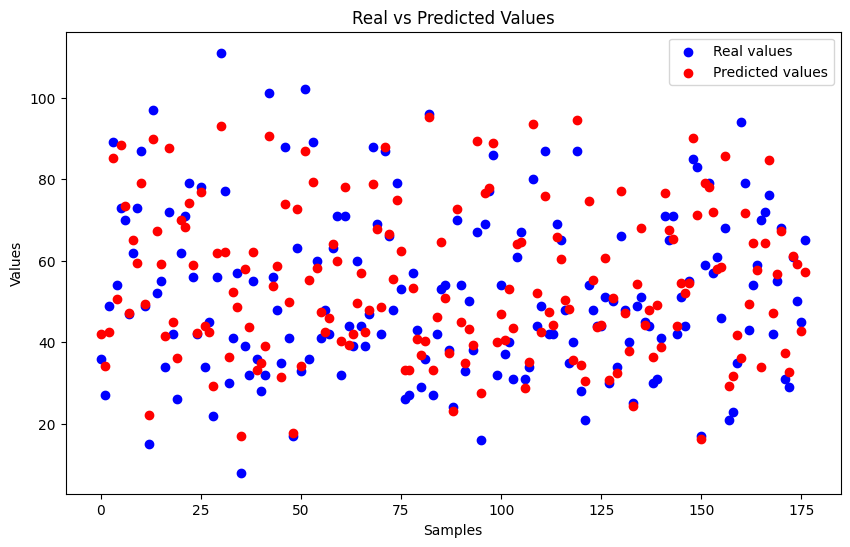

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

### Улучшение бейзлайна

Попробуем добавить полиноминальные признаки

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Оценка улучшенной модели
y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("LinearRegression Results:")
print(f"MSE: {mse_poly}")
print(f"R2: {r2_poly}")

LinearRegression Results:
MSE: 98.41185963582703
R2: 0.7592194649495474


Несмотря на то, что мы добавили полиномиальные параметры, модель не только не улучшилась, а показала более худшие результаты. Это сведетельствует о том, что имеет место переобучение.

### Собственная реализация


In [17]:
class MyLinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.weights

In [18]:
X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)

linear_model = MyLinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

print("LinearRegression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

LinearRegression Results:
MSE: 92.12916786377498
R2: 0.7745910867442143


## Решающее дерево
### Создание бейзлайна и оценка качества

In [20]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Decision tree results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

Decision tree results:
MSE: 234.92090395480227
R2: 0.4252280044489587


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


### Улучшение бейзлайна

Попробуем улучшить метрики с помощью подбора гиперпараметров

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Decision tree optimized results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_best)}")
print(f"R2: {r2_score(y_test, y_pred_best)}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision tree optimized results:
MSE: 122.37562277289949
R2: 0.7005882417278897


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


### Выводы
С помощью подбора гиперпараметров удалось улучшить метрики почти в два раза 

Структура лучшего дерева:
|--- Distance_km <= 9.76
|   |--- Distance_km <= 4.77
|   |   |--- Preparation_Time_min <= 20.50
|   |   |   |--- Weather <= 0.50
|   |   |   |   |--- Preparation_Time_min <= 13.50
|   |   |   |   |   |--- value: [19.88]
|   |   |   |   |--- Preparation_Time_min >  13.50
|   |   |   |   |   |--- value: [30.67]
|   |   |   |--- Weather >  0.50
|   |   |   |   |--- Traffic_Level <= 0.50
|   |   |   |   |   |--- value: [42.91]
|   |   |   |   |--- Traffic_Level >  0.50
|   |   |   |   |   |--- value: [32.24]
|   |   |--- Preparation_Time_min >  20.50
|   |   |   |--- Weather <= 2.50
|   |   |   |   |--- Distance_km <= 1.24
|   |   |   |   |   |--- value: [33.38]
|   |   |   |   |--- Distance_km >  1.24
|   |   |   |   |   |--- value: [40.77]
|   |   |   |--- Weather >  2.50
|   |   |   |   |--- Traffic_Level <= 0.50
|   |   |   |   |   |--- value: [54.25]
|   |   |   |   |--- Traffic_Level >  0.50
|   |   |   |   |   |--- value: [45.20]
|   |--- Distance_km >  4.

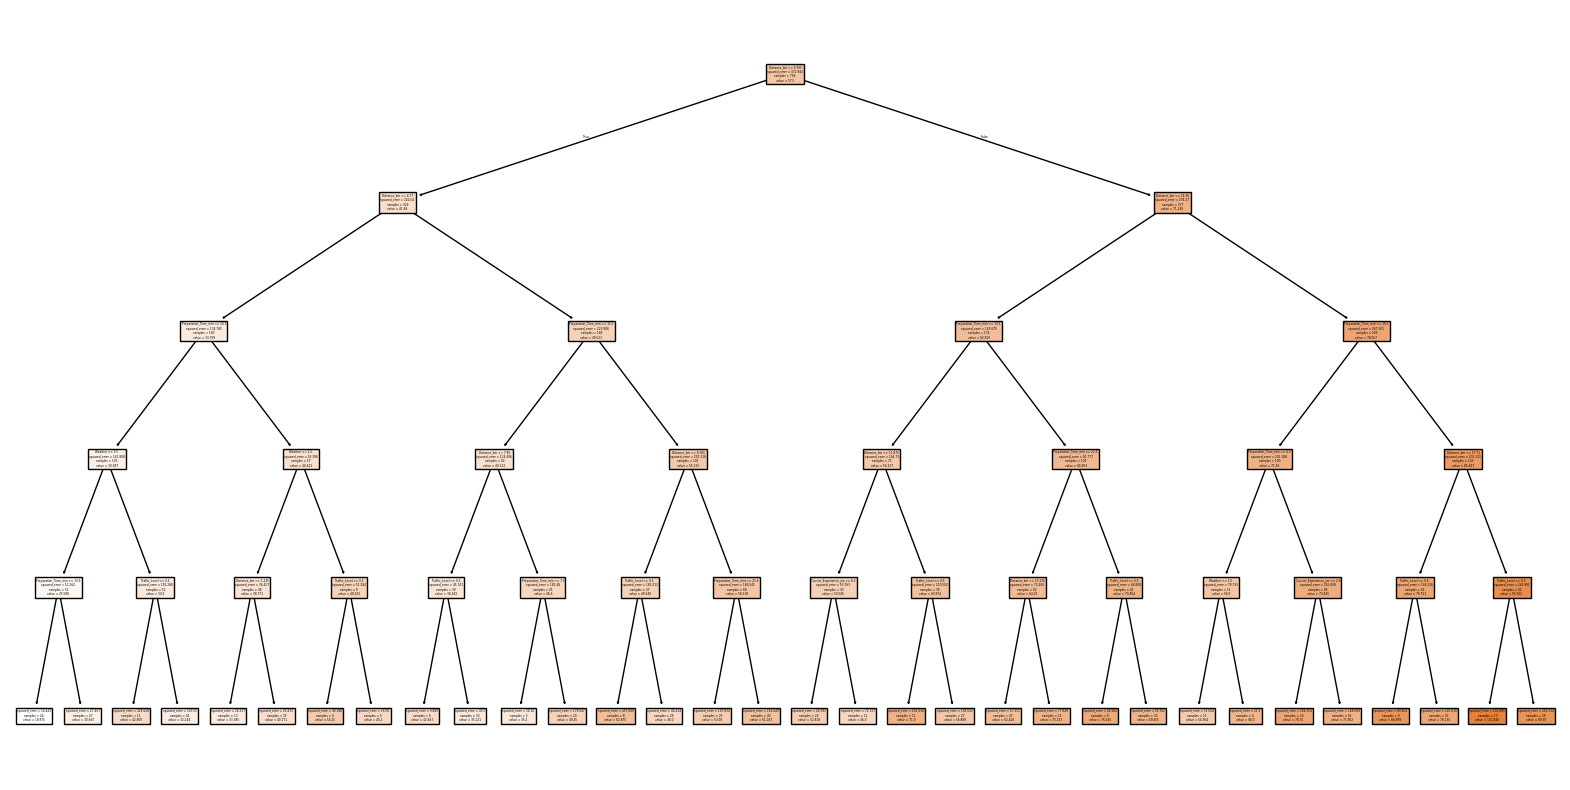

In [29]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt


print("Структура лучшего дерева:")
print(export_text(best_model, feature_names=list(X.columns)))

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, filled=True)
plt.show()

## Собственная реализация алгоритма машнного обучения

In [ ]:
class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.tree = self._build_tree(self.X, self.y, depth=0)

    def _build_tree(self, X, y, depth):
        # Если все значения целевой переменной одинаковы, то это лист
        if len(set(y)) == 1:
            return {'leaf': True, 'value': y[0]}
        
        if self.max_depth is not None and depth >= self.max_depth:
            return {'leaf': True, 'value': np.mean(y)}
        
        best_split = self._find_best_split(X, y)
        
        if best_split is None:
            return {'leaf': True, 'value': np.mean(y)}
        
        left_tree = self._build_tree(best_split['left_X'], best_split['left_y'], depth + 1)
        right_tree = self._build_tree(best_split['right_X'], best_split['right_y'], depth + 1)
        
        return {
            'leaf': False,
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_split = None
        
        n_samples, n_features = X.shape
        
        for feature_index in range(n_features):
            sorted_indices = np.argsort(X[:, feature_index])
            sorted_X = X[sorted_indices]
            sorted_y = y[sorted_indices]
            
            for i in range(1, n_samples):
                if sorted_X[i-1, feature_index] == sorted_X[i, feature_index]:
                    continue
                
                threshold = (sorted_X[i-1, feature_index] + sorted_X[i, feature_index]) / 2
            
                left_mask = sorted_X[:, feature_index] <= threshold
                right_mask = ~left_mask
                
                left_y = sorted_y[left_mask]
                right_y = sorted_y[right_mask]
                
                mse = self._calculate_mse(left_y, right_y)
                
                if mse < best_mse:
                    best_mse = mse
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_X': X[left_mask],
                        'left_y': left_y,
                        'right_X': X[right_mask],
                        'right_y': right_y
                    }
        
        return best_split

    def _calculate_mse(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y))**2) if len(left_y) > 0 else 0
        right_mse = np.mean((right_y - np.mean(right_y))**2) if len(right_y) > 0 else 0
        return left_mse * len(left_y) / (len(left_y) + len(right_y)) + right_mse * len(right_y) / (len(left_y) + len(right_y))

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, tree):
        if tree['leaf']:
            return tree['value']
        
        if x[tree['feature_index']] <= tree['threshold']:
            return self._predict_single(x, tree['left'])
        else:
            return self._predict_single(x, tree['right'])


In [65]:
model = CustomDecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Custom decision tree results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


Custom decision tree results:
MSE: 260.75784641418386
R2: 0.36201374498410777


### Выводы
Моя реализация оказалась хуже чем библиотечная реализация

## Случайный лес
### Создание бейзлайна и оценка качества

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random forest results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

Random forest results:
MSE: 99.20535254237289
R2: 0.7572780561873935


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


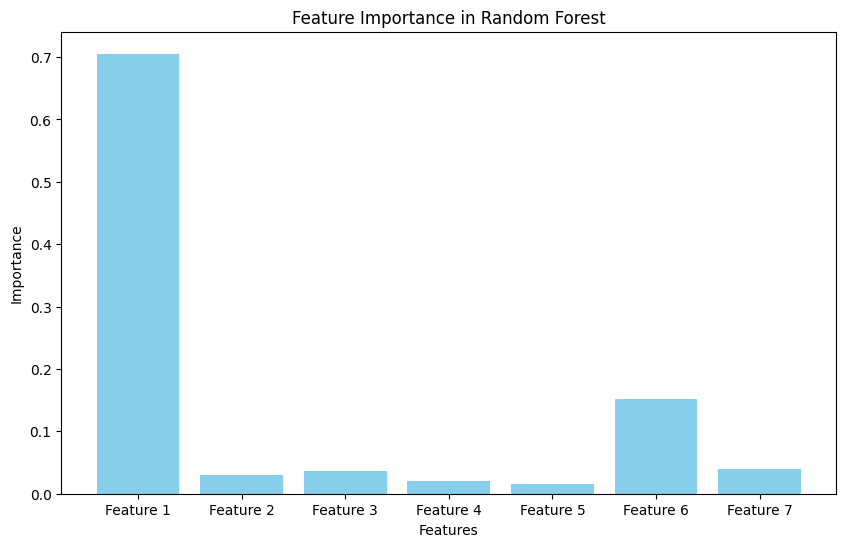

In [59]:
feature_importance = rf.feature_importances_


plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance, color='skyblue')
plt.xticks(range(X.shape[1]), [f'Feature {i+1}' for i in range(X.shape[1])])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()


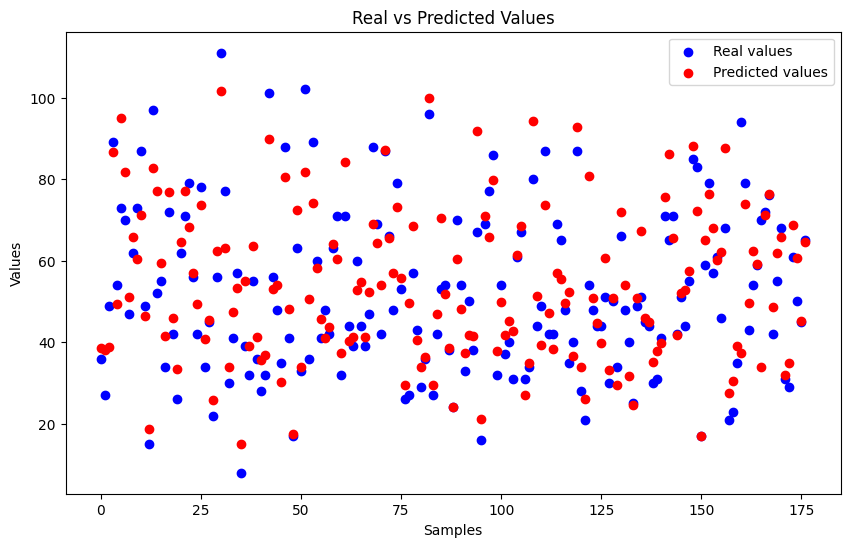

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

### Улучшение бейзлайна

In [37]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

y_pred_improved = grid_search.best_estimator_.predict(X_test)

print("Improved Random forest results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_improved)}")
print(f"R2: {r2_score(y_test, y_pred_improved)}")


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Improved Random forest results:
MSE: 97.34736399176353
R2: 0.7618239257501558


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### Выводы

Наши метрики улучшились, но не настолько значительно

### Собственная реализация алгоритма машинного обучения

In [ ]:
from sklearn.utils import resample

class RandomForestRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators  # Количество деревьев
        self.max_depth = max_depth  # Максимальная глубина деревьев
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        for _ in range(self.n_estimators):
            X_resampled, y_resampled = resample(X, y, random_state=self.random_state)
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_resampled, y_resampled)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)

In [47]:
rf = RandomForestRegressorCustom(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("My Random forest results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

Improved Random forest results:
MSE: 249.4440408955468
R2: 0.3896948004617188


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted with

### Выводы

Моя реализация оказалась значительно хуже чем библиотечная

## Градиентный бустинг
### Создание бейзлайна и оценка качества

In [61]:
from sklearn.ensemble import GradientBoostingRegressor


gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)


print("Gradient boosting results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


Gradient boosting results:
MSE: 90.2708158811147
R2: 0.7791378455022828


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


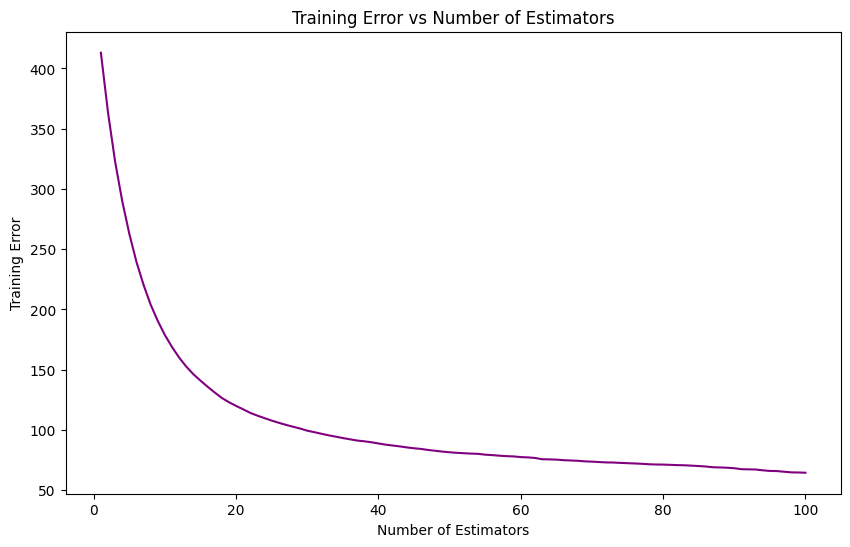

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(gb.train_score_) + 1), gb.train_score_, color='purple')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Error')
plt.title('Training Error vs Number of Estimators')
plt.show()

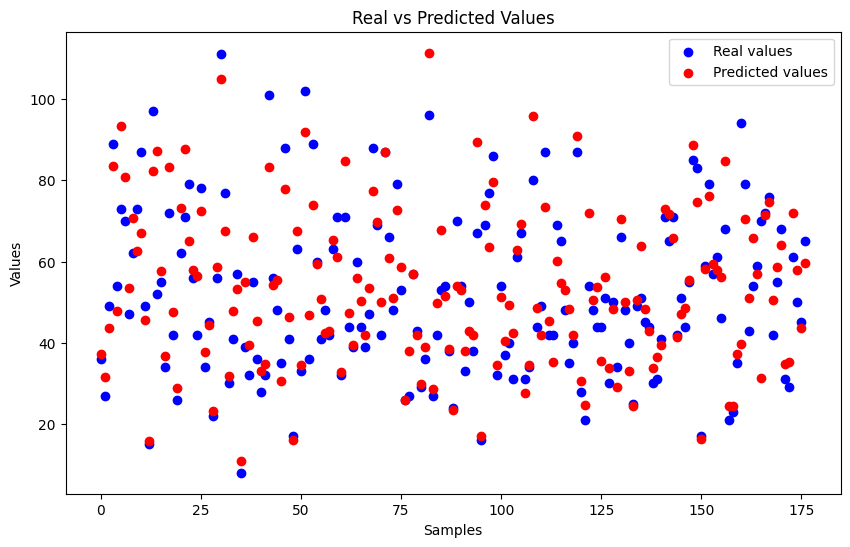

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

### Улучшение бейзлайна

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

y_pred_improved = grid_search.best_estimator_.predict(X_test)


print("Improved Gradient boosting results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_improved)}")
print(f"R2: {r2_score(y_test, y_pred_improved)}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Improved Gradient boosting results:
MSE: 89.30505762173442
R2: 0.7815007293181508


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


### Выводы

После подбора гиперпараметров результаты улучшились, но незначительно

### Собственная реализация алгоритма машинного обучения

In [ ]:
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressorCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators  
        self.learning_rate = learning_rate  
        self.max_depth = max_depth  
        self.trees = [] 
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full_like(y, fill_value=self.initial_prediction, dtype=np.float64)
        
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            tree_pred = tree.predict(X)
            y_pred += self.learning_rate * tree_pred
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full(X.shape[0], fill_value=self.initial_prediction, dtype=np.float64)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

In [53]:
gb_custom = GradientBoostingRegressorCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_custom.fit(X_train, y_train)
y_pred = gb_custom.predict(X_test)

print("My Gradient boosting results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

My Gradient boosting results:
MSE: 90.2708158811147
R2: 0.7791378455022828


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted with

### Выводы 

Моя реализация оказалась очень близка к библиотечной.

## Выводы по выполненым работам

Подведем итоги всех моделей. Выведем сводную таблицу по всем моделям и их метрикам

| **Модель**            | **Тип**              | **MSE**      | **R²**      |
|-----------------------|----------------------|--------------|-------------|
| **KNN**              | Бейзлайн             | 115.03       | 0.7186      |
|                      | Улучшенный бейзлайн  | **104.24**   | **0.7450**  |
|                      | Своя реализация      | 162.93       | 0.6014      |
| **Линейная регрессия**| Бейзлайн             | **92.13**    | **0.7746**  |
|                      | Улучшенный бейзлайн  | 98.41        | 0.7592      |
|                      | Своя реализация      | **92.13**    | **0.7746**  |
| **Решающее дерево**  | Бейзлайн             | 234.92       | 0.4252      |
|                      | Улучшенный бейзлайн  | **122.38**   | **0.7006**  |
|                      | Своя реализация      | 260.76       | 0.3620      |
| **Случайный лес**    | Бейзлайн             | 99.21        | 0.7573      |
|                      | Улучшенный бейзлайн  | **97.35**    | **0.7618**  |
|                      | Своя реализация      | 249.44       | 0.3897      |
| **Градиентный бустинг** | Бейзлайн          | 90.27        | 0.7791      |
|                      | Улучшенный бейзлайн  | **89.31**    | **0.7815**  |
|                      | Своя реализация      | 90.27        | 0.7791      |


### Вывод по результатам:
**KNN (k-ближайших соседей):**

Улучшенный бейзлайн показывает снижение MSE до 104.24 и улучшение R² до 0.7450, что свидетельствует о повышении качества модели.
Однако собственная реализация уступает и показывает наибольшую ошибку (MSE 162.93) и низкий коэффициент детерминации (R² 0.6014).

**Линейная регрессия:**

Бейзлайн и собственная реализация демонстрируют идентичные результаты, достигая наименьшей MSE (92.13) и R² (0.7746).
Улучшенный бейзлайн уступает с MSE 98.41 и R² 0.7592, что может указывать на недостаточную эффективность улучшений.

**Решающее дерево:**

Улучшенный бейзлайн значительно превосходит обычный бейзлайн и собственную реализацию, снижая MSE до 122.38 и увеличивая R² до 0.7006.
Бейзлайн и собственная реализация имеют высокий MSE (234.92 и 260.76) и низкий R² (0.4252 и 0.3620), что свидетельствует о слабой предсказательной способности дерева решений в базовой настройке.

**Случайный лес:**

Улучшенный бейзлайн показывает лучшие результаты с MSE 97.35 и R² 0.7618.
Бейзлайн близок по качеству, но уступает (MSE 99.21, R² 0.7573).
Собственная реализация имеет значительно худшие результаты (MSE 249.44, R² 0.3897).

**Градиентный бустинг:**

Улучшенный бейзлайн показывает лучшие результаты среди всех моделей с минимальным MSE (89.31) и максимальным R² (0.7815).
Бейзлайн демонстрирует лишь незначительное отставание (MSE 90.27, R² 0.7791).
Собственная реализация идентична бейзлайну, что говорит о корректной реализации алгоритма.


### Общий вывод:
Лучшей моделью среди всех является градиентный бустинг с улучшенным бейзлайном, достигающий наименьшего значения ошибки и наивысшего коэффициента детерминации.
KNN и решающее дерево показывают значительно худшие результаты по сравнению с другими моделями, особенно в собственных реализациях.

Улучшения в бейзлайнах дали заметное повышение качества, особенно для дерева решений и случайного леса.
Собственные реализации, за исключением линейной регрессии и градиентного бустинга, требуют доработки, так как их результаты значительно уступают бейзлайнам.



